In [111]:
import torch
import torch.optim as optim
import torch.utils.data
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [112]:
#--- hyperparameters ---
N_EPOCHS = 200
BATCH_SIZE_TRAIN = 128
BATCH_SIZE_TEST = 128
BATCH_SIZE_VALIDATION = 128
LR = 0.01

In [113]:
#--- fixed constants ---
NUM_CLASSES = 24
DATA_DIR = '../data/sign_mnist_%s'

In [114]:
# --- Dataset initialization ---

# We transform image files' contents to tensors
# Plus, we can add random transformations to the training data if we like
# Think on what kind of transformations may be meaningful for this data.
# Eg., horizontal-flip is definitely a bad idea for sign language data.
# You can use another transformation here if you find a better one.
train_transform = transforms.Compose([
                                        #transforms.RandomRotation(degrees=20),
                                        #transforms.RandomCrop(size=(24, 24)),
                                        #transforms.Pad(padding=2),
                                        transforms.ToTensor()
                                    ])
test_transform = transforms.Compose([transforms.ToTensor()])

train_set = datasets.ImageFolder(DATA_DIR % 'train', transform=train_transform)
dev_set   = datasets.ImageFolder(DATA_DIR % 'dev',   transform=test_transform)
test_set  = datasets.ImageFolder(DATA_DIR % 'test',  transform=test_transform)

# Create Pytorch data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE_TEST, shuffle=False)
validation_loader = torch.utils.data.DataLoader(dataset=dev_set, batch_size=BATCH_SIZE_VALIDATION, shuffle=True)

In [115]:
#--- model ---
class CNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 10, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 100),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(50, NUM_CLASSES),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x

In [124]:
#--- set up ---
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

model = CNN().to(device)

optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.5)
loss_function = F.nll_loss

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout(p=0.5, inplace=False)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (5): Dropout(p=0.5, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=320, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Linear(in_features=50, out_features=24, bias=True)
    (7): LogSoftmax()
  )
)


Training: Epoch 0 - Batch 0/215: Loss: 3.1852 | Train Acc: 6.250% (8/128)
Training: Epoch 0 - Batch 25/215: Loss: 0.1224 | Train Acc: 4.237% (141/3328)
Training: Epoch 0 - Batch 50/215: Loss: 0.0625 | Train Acc: 4.366% (285/6528)
Training: Epoch 0 - Batch 75/215: Loss: 0.0419 | Train Acc: 4.225% (411/9728)
Training: Epoch 0 - Batch 100/215: Loss: 0.0315 | Train Acc: 4.409% (570/12928)
Training: Epoch 0 - Batch 125/215: Loss: 0.0252 | Train Acc: 4.384% (707/16128)
Training: Epoch 0 - Batch 150/215: Loss: 0.0210 | Train Acc: 4.450% (860/19328)
Training: Epoch 0 - Batch 175/215: Loss: 0.0181 | Train Acc: 4.426% (997/22528)
Training: Epoch 0 - Batch 200/215: Loss: 0.0158 | Train Acc: 4.462% (1148/25728)
Validation: Epoch 0: Loss: 89.0234 | Validation Acc: 3.057% (107/3500)
Training: Epoch 1 - Batch 0/215: Loss: 3.1692 | Train Acc: 4.688% (6/128)
Training: Epoch 1 - Batch 25/215: Loss: 0.1222 | Train Acc: 4.808% (160/3328)
Training: Epoch 1 - Batch 50/215: Loss: 0.0621 | Train Acc: 4.841% (

Training: Epoch 10 - Batch 100/215: Loss: 0.0092 | Train Acc: 70.823% (9156/12928)
Training: Epoch 10 - Batch 125/215: Loss: 0.0074 | Train Acc: 70.964% (11445/16128)
Training: Epoch 10 - Batch 150/215: Loss: 0.0054 | Train Acc: 71.192% (13760/19328)
Training: Epoch 10 - Batch 175/215: Loss: 0.0038 | Train Acc: 71.356% (16075/22528)
Training: Epoch 10 - Batch 200/215: Loss: 0.0045 | Train Acc: 71.630% (18429/25728)
Validation: Epoch 10: Loss: 29.9267 | Validation Acc: 63.229% (2213/3500)
Training: Epoch 11 - Batch 0/215: Loss: 0.8696 | Train Acc: 67.188% (86/128)
Training: Epoch 11 - Batch 25/215: Loss: 0.0309 | Train Acc: 71.755% (2388/3328)
Training: Epoch 11 - Batch 50/215: Loss: 0.0134 | Train Acc: 73.284% (4784/6528)
Training: Epoch 11 - Batch 75/215: Loss: 0.0096 | Train Acc: 72.995% (7101/9728)
Training: Epoch 11 - Batch 100/215: Loss: 0.0073 | Train Acc: 73.314% (9478/12928)
Training: Epoch 11 - Batch 125/215: Loss: 0.0054 | Train Acc: 73.624% (11874/16128)
Training: Epoch 11 -

Training: Epoch 20 - Batch 125/215: Loss: 0.0038 | Train Acc: 85.987% (13868/16128)
Training: Epoch 20 - Batch 150/215: Loss: 0.0026 | Train Acc: 86.062% (16634/19328)
Training: Epoch 20 - Batch 175/215: Loss: 0.0021 | Train Acc: 86.155% (19409/22528)
Training: Epoch 20 - Batch 200/215: Loss: 0.0020 | Train Acc: 86.182% (22173/25728)
Validation: Epoch 20: Loss: 19.9174 | Validation Acc: 76.514% (2678/3500)
Training: Epoch 21 - Batch 0/215: Loss: 0.4290 | Train Acc: 85.156% (109/128)
Training: Epoch 21 - Batch 25/215: Loss: 0.0161 | Train Acc: 86.298% (2872/3328)
Training: Epoch 21 - Batch 50/215: Loss: 0.0064 | Train Acc: 86.596% (5653/6528)
Training: Epoch 21 - Batch 75/215: Loss: 0.0060 | Train Acc: 86.935% (8457/9728)
Training: Epoch 21 - Batch 100/215: Loss: 0.0029 | Train Acc: 87.005% (11248/12928)
Training: Epoch 21 - Batch 125/215: Loss: 0.0028 | Train Acc: 87.140% (14054/16128)
Training: Epoch 21 - Batch 150/215: Loss: 0.0018 | Train Acc: 87.153% (16845/19328)
Training: Epoch 2

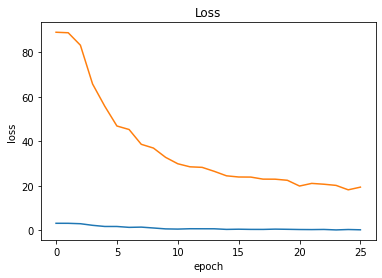

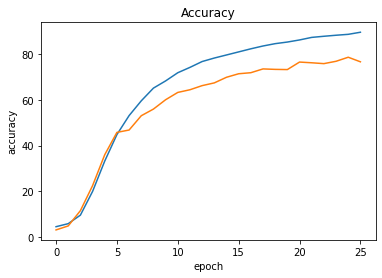

In [125]:
training_losses = []
validation_losses = []

training_accuracies = []
validation_accuracies = []


epoch_stopped = 0

#--- training ---
for epoch in range(N_EPOCHS):
    train_loss = 0
    train_correct = 0
    total = 0
    for batch_num, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad() 
        output = model(data)
        train_loss = loss_function(output, target)
        train_loss.backward()
        optimizer.step()
        
        pred = output.max(1, keepdim=True)[1]
        train_correct += pred.eq(target.view_as(pred)).sum().item()
        total += data.shape[0]

        if batch_num % 25 == 0:
            print('Training: Epoch %d - Batch %d/%d: Loss: %.4f | Train Acc: %.3f%% (%d/%d)' % 
                  (epoch, batch_num, len(train_loader), train_loss / (batch_num + 1), 
                   100. * train_correct / total, train_correct, total))
    
    validation_loss = 0
    validation_correct = 0
    validation_total = 0
    
    with torch.no_grad():
        for batch_num, (data, target) in enumerate(validation_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            validation_loss += loss_function(output, target).item()
            
            pred = output.max(1, keepdim=True)[1]
            validation_correct += pred.eq(target.view_as(pred)).sum().item()
            validation_total += data.shape[0]

    
    print('Validation: Epoch %d: Loss: %.4f | Validation Acc: %.3f%% (%d/%d)' % 
          (epoch, validation_loss, (100. * validation_correct / validation_total), validation_correct, 
           validation_total))
    
    # Check if average of the last 5 validation losses is smaller than current validation loss
    if epoch > 4 and statistics.mean(validation_losses[-5:]) < validation_loss:
        epoch_stopped = epoch
        break
        
    training_losses.append(train_loss)
    validation_losses.append(validation_loss)
        
    training_accuracies.append((100. * train_correct / total))
    validation_accuracies.append((100. * validation_correct / validation_total))

    
plt.plot(range(epoch_stopped), training_losses, label = "Training loss")
plt.plot(range(epoch_stopped), validation_losses, label = "Validation loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(range(epoch_stopped), training_accuracies, label = "Training accuracy")
plt.plot(range(epoch_stopped), validation_accuracies, label = "Validation accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [133]:
#--- test ---
test_loss = 0
test_correct = 0
total = 0

with torch.no_grad():
    for batch_num, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        test_loss += loss_function(output, target).item()
        pred = output.max(1, keepdim=True)[1]
        test_correct += pred.eq(target.view_as(pred)).sum().item()
        total += data.shape[0]

        test_loss /= len(test_loader.dataset)
        
        if batch_num % 25 == 0:

            print('Evaluating: Batch %d/%d: Loss: %.4f | Test Acc: %.3f%% (%d/%d)' % 
                  (batch_num, len(test_loader), test_loss / (batch_num + 1), 
                   100. * test_correct / total, test_correct, total))

print("Final test score: Loss: %.4f, Accuracy: %.3f%%" % (test_loss, (100. * test_correct / total)))

Evaluating: Batch 0/29: Loss: 0.0001 | Test Acc: 91.406% (117/128)
Evaluating: Batch 25/29: Loss: 0.0000 | Test Acc: 77.734% (2587/3328)
Final test score: Loss: 0.0003, Accuracy: 78.023%
